# Big Data Project
# *https://raw.githubusercontent.com/devbabar/realestate_data_analysis/master/Sacramento_realestate_transactions.csv*
# House Price Prediction
# 8771 - Danial Ahmed
# 8774 - Talha Akram
# 8797 - Shayan akhter

### The purpose of this project is to Analyze, Pre-Process and apply Machine learning algorithm(s) on House Price dataset to predict new values.

### Our dataset contains 12 columns among which our target label is price
#### Street column contains street address/house number of the house
#### City column contains name of city in which house was sold
#### Zip contains zip code of the area
#### State contains the state/province in which house was sold
#### Beds column is used define number of bedrooms present in the house
#### Baths column is used for number of bathrooms in the house
#### sq__ft contains total Square Foot Area of the house
#### type defines which type of house was is it (residential, commerical etc)
#### latitude, longitude are the coordinates of the house

### We will first use Pyspark to analyze the data.

#### Import Pyspark and read csv

In [1]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import Row, SQLContext
import numpy as np

In [2]:
sc = SparkContext()

In [3]:
sqlContext = SQLContext(sc)
df = sqlContext.read.csv("house_price_dataset.csv",header=True,inferSchema=True)

In [4]:
df.printSchema()

root
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- beds: integer (nullable = true)
 |-- baths: integer (nullable = true)
 |-- sq__ft: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- sale_date: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)



In [5]:
df.show(5)

+----------------+----------+-----+-----+----+-----+------+-----------+--------------------+-----+---------+-----------+
|          street|      city|  zip|state|beds|baths|sq__ft|       type|           sale_date|price| latitude|  longitude|
+----------------+----------+-----+-----+----+-----+------+-----------+--------------------+-----+---------+-----------+
|    3526 HIGH ST|SACRAMENTO|95838|   CA|   2|    1|   836|Residential|Wed May 21 00:00:...|59222|38.631913|-121.434879|
|     51 OMAHA CT|SACRAMENTO|95823|   CA|   3|    1|  1167|Residential|Wed May 21 00:00:...|68212|38.478902|-121.431028|
|  2796 BRANCH ST|SACRAMENTO|95815|   CA|   2|    1|   796|Residential|Wed May 21 00:00:...|68880|38.618305|-121.443839|
|2805 JANETTE WAY|SACRAMENTO|95815|   CA|   2|    1|   852|Residential|Wed May 21 00:00:...|69307|38.616835|-121.439146|
| 6001 MCMAHON DR|SACRAMENTO|95824|   CA|   2|    1|   797|Residential|Wed May 21 00:00:...|81900| 38.51947|-121.435768|
+----------------+----------+---

#### Group by to see number of entries for each city

In [6]:
df.groupby('city').agg({'city':'count'}).sort("count(city)").show(200)

+---------------+-----------+
|           city|count(city)|
+---------------+-----------+
|DIAMOND SPRINGS|          1|
|         PENRYN|          1|
|   MEADOW VISTA|          1|
|         MATHER|          1|
|SHINGLE SPRINGS|          1|
|     FORESTHILL|          1|
|  GARDEN VALLEY|          1|
|    SLOUGHHOUSE|          1|
|   WALNUT GROVE|          1|
|           COOL|          1|
|      GREENWOOD|          1|
|      EL DORADO|          2|
|         LOOMIS|          2|
|WEST SACRAMENTO|          3|
| RANCHO MURIETA|          3|
|    GRANITE BAY|          3|
|  POLLOCK PINES|          3|
|        ELVERTA|          4|
|     GOLD RIVER|          4|
|         WILTON|          5|
|         AUBURN|          5|
|   CAMERON PARK|          9|
|      FAIR OAKS|          9|
|    PLACERVILLE|         10|
|     ORANGEVALE|         11|
|      RIO LINDA|         13|
|        ROCKLIN|         17|
|         FOLSOM|         17|
|     CARMICHAEL|         20|
|           GALT|         21|
|NORTH HIG

#### Group by to see number of entries for each state

In [7]:
df.groupby('state').agg({'state':'count'}).sort("count(state)").show(200)

+-----+------------+
|state|count(state)|
+-----+------------+
|   CA|         985|
+-----+------------+



##### Only one state?

#### Group by to see number of entries for each type

In [8]:
df.groupby('type').agg({'type':'count'}).sort("count(type)").show(200)

+------------+-----------+
|        type|count(type)|
+------------+-----------+
|      Unkown|          1|
|Multi-Family|         13|
|       Condo|         54|
| Residential|        917|
+------------+-----------+



#### Group by to see number of entries for number of bedrooms

In [9]:
df.groupby('beds').agg({'beds':'count'}).sort("count(beds)").show(200)

+----+-----------+
|beds|count(beds)|
+----+-----------+
|   8|          1|
|   6|          3|
|   1|         10|
|   5|         59|
|   0|        108|
|   2|        133|
|   4|        258|
|   3|        413|
+----+-----------+



#### Group by to see number of entries for number of bathrooms

In [10]:
df.groupby('baths').agg({'baths':'count'}).sort("count(baths)").show(200)

+-----+------------+
|baths|count(baths)|
+-----+------------+
|    5|           2|
|    4|          19|
|    0|         108|
|    3|         132|
|    1|         180|
|    2|         544|
+-----+------------+



##### 0? I think we have non-standard null values

In [11]:
df.filter('price<10000').show(5)

+------------------+-------+-----+-----+----+-----+------+-----------+--------------------+-----+---------+-----------+
|            street|   city|  zip|state|beds|baths|sq__ft|       type|           sale_date|price| latitude|  longitude|
+------------------+-------+-----+-----+----+-----+------+-----------+--------------------+-----+---------+-----------+
|20 CRYSTALWOOD CIR|LINCOLN|95648|   CA|   0|    0|     0|Residential|Mon May 19 00:00:...| 4897|38.885327|-121.289412|
|24 CRYSTALWOOD CIR|LINCOLN|95648|   CA|   0|    0|     0|Residential|Mon May 19 00:00:...| 4897|38.885132|-121.289405|
|28 CRYSTALWOOD CIR|LINCOLN|95648|   CA|   0|    0|     0|Residential|Mon May 19 00:00:...| 4897|38.884936|-121.289397|
|32 CRYSTALWOOD CIR|LINCOLN|95648|   CA|   0|    0|     0|Residential|Mon May 19 00:00:...| 4897|38.884741| -121.28939|
|36 CRYSTALWOOD CIR|LINCOLN|95648|   CA|   0|    0|     0|Residential|Mon May 19 00:00:...| 4897|38.884599|-121.289406|
+------------------+-------+-----+-----+

##### We surely have non-standard null values in beds, baths, sq__ft columns

In [12]:
from pyspark.sql.functions import countDistinct

#### Using countDistinct to see how many different areas we have

In [13]:
df.select(countDistinct('zip')).show()

+-------------------+
|count(DISTINCT zip)|
+-------------------+
|                 68|
+-------------------+



## Currentyl we know that there are *68 different areas* inside *1 state*, we have *3 different types of houses* having upto *8 bedrooms*, *5 bathrooms* and *multiple cities*

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
dataset = pd.read_csv("house_price_dataset.csv")

In [16]:
dataset.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### Using histogram to check overall house price

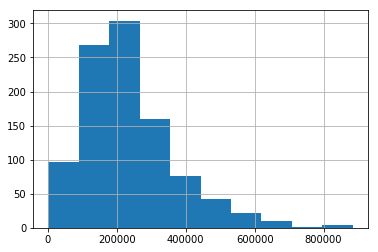

In [17]:
dataset['price'].hist()

##### Seems like majority of houses are between 100k to 240k?

#### Using scatters to see if there is any relation between house area,beds,baths with price

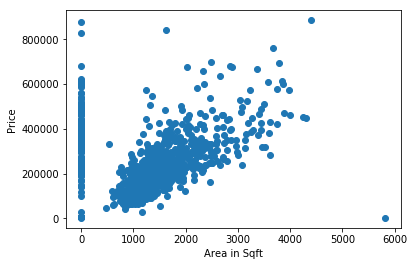

In [18]:
plt.scatter(x=dataset['sq__ft'],y=dataset['price'])
plt.xlabel("Area in Sqft")
plt.ylabel("Price")
plt.show()

##### zeros again?? There definetly is a relation between price and area but I believe area is not the only feature that is affecting increase of price

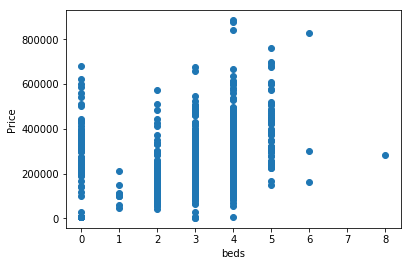

In [19]:
plt.scatter(x=dataset['beds'],y=dataset['price'])
plt.xlabel("beds")
plt.ylabel("Price")
plt.show()

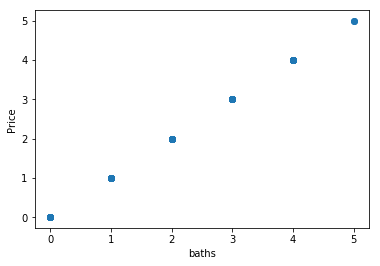

In [20]:
plt.scatter(x=dataset['baths'],y=dataset['baths'])
plt.xlabel("baths")
plt.ylabel("Price")
plt.show()

##### Seems like number of bathrooms has a greater role in defining price of house if compared with number of beds

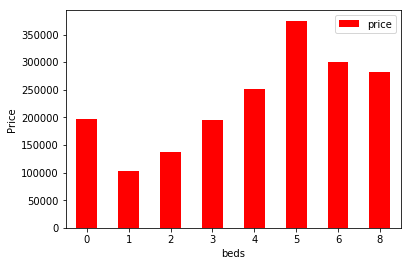

In [21]:
quality_pivot = dataset.pivot_table(index='beds',values='price',aggfunc=np.median)
quality_pivot.plot(kind='bar',color='red')
plt.xlabel("beds")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.show()

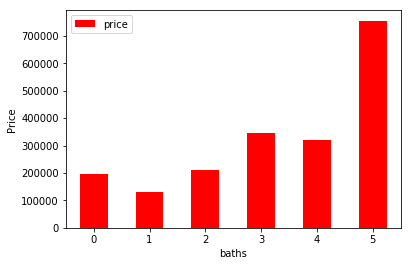

In [22]:
quality_pivot = dataset.pivot_table(index='baths',values='price',aggfunc=np.median)
quality_pivot.plot(kind='bar',color='red')
plt.xlabel("baths")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.show()

##### From the pivot above it seems like ideal number of bathrooms and bedrooms are 5

### Checking relation between zip & price

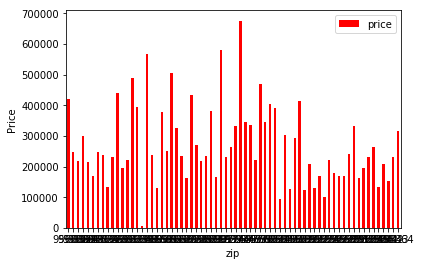

In [23]:
quality_pivot = dataset.pivot_table(index='zip',values='price',aggfunc=np.median)
quality_pivot.plot(kind='bar',color='red')
plt.xlabel("zip")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.show()

### Checking for null values

In [24]:
dataset.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

##### no null value? But in above analysis we did see that there is non-standard null value issue

### Dropping street, sale_date, latitude, longitude as I believe it has nothing to do with price of house

In [25]:
dataset.drop(['street','sale_date','latitude','longitude'],axis=1,inplace=True)

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
city      985 non-null object
zip       985 non-null int64
state     985 non-null object
beds      985 non-null int64
baths     985 non-null int64
sq__ft    985 non-null int64
type      985 non-null object
price     985 non-null int64
dtypes: int64(5), object(3)
memory usage: 61.7+ KB


### Handling those non-standard nulls we saw earlier.

In [27]:
cols = ["beds","baths","sq__ft"]
dataset[cols] = dataset[cols].replace({0:np.nan, 0:np.nan})

### Now we can see that there are queit a few null values, which I will simply drop instead of filling
### because I dont think I can randomly fill number of beds,baths and area with mean,median

In [28]:
dataset.isnull().sum()

city        0
zip         0
state       0
beds      108
baths     108
sq__ft    171
type        0
price       0
dtype: int64

In [29]:
dataset = dataset[dataset['sq__ft'].notna()]

In [30]:
dataset.isnull().sum()

city      0
zip       0
state     0
beds      0
baths     0
sq__ft    0
type      0
price     0
dtype: int64

##### Null values handled

### Masking the data as *Other* if it occurs <15 times

In [31]:
dataset['state'].value_counts()

CA    814
Name: state, dtype: int64

In [32]:
city_count = dataset['city'].value_counts()
city_count

SACRAMENTO         424
ELK GROVE          107
CITRUS HEIGHTS      35
ANTELOPE            33
ROSEVILLE           28
NORTH HIGHLANDS     21
RANCHO CORDOVA      21
GALT                20
CARMICHAEL          20
FOLSOM              15
RIO LINDA           12
ORANGEVALE          11
FAIR OAKS            9
ROCKLIN              8
LINCOLN              6
PLACERVILLE          5
ELVERTA              4
WILTON               4
GRANITE BAY          3
POLLOCK PINES        3
AUBURN               3
EL DORADO HILLS      3
GOLD RIVER           3
LOOMIS               2
RANCHO MURIETA       2
EL DORADO            2
CAMERON PARK         1
GREENWOOD            1
DIAMOND SPRINGS      1
WEST SACRAMENTO      1
SLOUGHHOUSE          1
WALNUT GROVE         1
MEADOW VISTA         1
COOL                 1
PENRYN               1
MATHER               1
Name: city, dtype: int64

In [33]:
type_count = dataset['type'].value_counts()
type_count

Residential     759
Condo            42
Multi-Family     13
Name: type, dtype: int64

In [34]:
city_mask = dataset['city'].isin(city_count[city_count<15].index)
type_mask = dataset['type'].isin(type_count[type_count<15].index)

In [35]:
dataset['city'][city_mask] = 'Other'

In [36]:
dataset['type'][type_mask] = 'Other'

In [37]:
dataset['type'].value_counts()

Residential    759
Condo           42
Other           13
Name: type, dtype: int64

In [38]:
dataset['city'].value_counts()

SACRAMENTO         424
ELK GROVE          107
Other               90
CITRUS HEIGHTS      35
ANTELOPE            33
ROSEVILLE           28
NORTH HIGHLANDS     21
RANCHO CORDOVA      21
CARMICHAEL          20
GALT                20
FOLSOM              15
Name: city, dtype: int64

### One Hot Encoding Categorical data, because we know that machine learning algorithms dont work well with string based data

In [39]:
dataset = pd.get_dummies(dataset,columns=['state','city','type'],prefix=['st','ct','t'])

In [40]:
dataset.columns

Index(['zip', 'beds', 'baths', 'sq__ft', 'price', 'st_CA', 'ct_ANTELOPE',
       'ct_CARMICHAEL', 'ct_CITRUS HEIGHTS', 'ct_ELK GROVE', 'ct_FOLSOM',
       'ct_GALT', 'ct_NORTH HIGHLANDS', 'ct_Other', 'ct_RANCHO CORDOVA',
       'ct_ROSEVILLE', 'ct_SACRAMENTO', 't_Condo', 't_Other', 't_Residential'],
      dtype='object')

In [41]:
dataset.head()

,zip,beds,baths,sq__ft,price,st_CA,ct_ANTELOPE,ct_CARMICHAEL,ct_CITRUS HEIGHTS,ct_ELK GROVE,ct_FOLSOM,ct_GALT,ct_NORTH HIGHLANDS,ct_Other,ct_RANCHO CORDOVA,ct_ROSEVILLE,ct_SACRAMENTO,t_Condo,t_Other,t_Residential
0,95838,2.0,1.0,836.0,59222,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,95823,3.0,1.0,1167.0,68212,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,95815,2.0,1.0,796.0,68880,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,95815,2.0,1.0,852.0,69307,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,95824,2.0,1.0,797.0,81900,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Normalizing the data using MinMaxScaler so that the data is in between 0-1

In [42]:
nonCat_columns = ['zip','beds','baths','sq__ft']
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

In [43]:
for i in nonCat_columns:
    scl.fit(dataset[[i]])
    dataset[i] = scl.transform(dataset[[i]])

In [44]:
dataset.head()

,zip,beds,baths,sq__ft,price,st_CA,ct_ANTELOPE,ct_CARMICHAEL,ct_CITRUS HEIGHTS,ct_ELK GROVE,ct_FOLSOM,ct_GALT,ct_NORTH HIGHLANDS,ct_Other,ct_RANCHO CORDOVA,ct_ROSEVILLE,ct_SACRAMENTO,t_Condo,t_Other,t_Residential
0,0.900383,0.142857,0.0,0.065942,59222,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.842912,0.285714,0.0,0.127951,68212,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0.812261,0.142857,0.0,0.058449,68880,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.812261,0.142857,0.0,0.068940,69307,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.846743,0.142857,0.0,0.058636,81900,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


### Machine Learning

#### Gradient Boosting Regressor

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [46]:
X = dataset.drop(['price'],axis=1)
Y = dataset['price']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [48]:
model = GradientBoostingRegressor(n_estimators=1500,learning_rate=0.01)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Model Score: " + str(model.score(x_test,y_test)))

#### Randomly selecting predicted data vs actual data

In [49]:
import random
indexes = []
actual = y_test.iloc[:].values
for i in range(0,20):
    temp = random.randint(0,len(predictions)-1)
    if temp not in indexes:
        print("Predicted: "+str(predictions[temp])+" - Actual: "+str(actual[temp]))
        indexes.append(temp)

Predicted: 159463.3973551003 - Actual: 148750
Predicted: 138693.83666718734 - Actual: 145000
Predicted: 768308.3860678865 - Actual: 691659
Predicted: 195405.37177863915 - Actual: 225000
Predicted: 149206.4703108199 - Actual: 65000
Predicted: 315213.87917691085 - Actual: 445000
Predicted: 142788.24672753434 - Actual: 244960
Predicted: 203119.20994274737 - Actual: 225000
Predicted: 360813.24522189045 - Actual: 485000
Predicted: 273413.29410375206 - Actual: 223058
Predicted: 209335.97660536537 - Actual: 207000
Predicted: 134002.24278768385 - Actual: 78400
Predicted: 256461.6715575343 - Actual: 347029
Predicted: 86940.04221270708 - Actual: 75000
Predicted: 285063.9055024084 - Actual: 291000
Predicted: 164617.0228697754 - Actual: 264469
Predicted: 186129.58478657753 - Actual: 189000
Predicted: 115286.24755467336 - Actual: 63000
Predicted: 184670.58607844348 - Actual: 157500
Predicted: 212853.19499741602 - Actual: 265000


#### KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3) 
model.fit(x_train, y_train)
predictions = model.predict(x_test)
model_score = model.score(x_test,y_test)
#print(model_score)

#### Randomly selecting predicted data vs actual data

In [51]:
import random
indexes = []
actual = y_test.iloc[:].values
for i in range(0,20):
    temp = random.randint(0,len(predictions)-1)
    if temp not in indexes:
        print("Predicted: "+str(predictions[temp])+" - Actual: "+str(actual[temp]))
        indexes.append(temp)

Predicted: 253192.66666666666 - Actual: 230000
Predicted: 192341.33333333334 - Actual: 299000
Predicted: 240002.0 - Actual: 126000
Predicted: 325601.6666666667 - Actual: 234000
Predicted: 159417.33333333334 - Actual: 63000
Predicted: 492000.0 - Actual: 423000
Predicted: 170416.66666666666 - Actual: 416767
Predicted: 272954.0 - Actual: 225000
Predicted: 221119.66666666666 - Actual: 132000
Predicted: 394416.6666666667 - Actual: 539000
Predicted: 247083.33333333334 - Actual: 506688
Predicted: 96003.33333333333 - Actual: 65000
Predicted: 107736.66666666667 - Actual: 77000
Predicted: 172833.33333333334 - Actual: 181000
Predicted: 198119.0 - Actual: 168000
Predicted: 226000.0 - Actual: 255000
Predicted: 247666.66666666666 - Actual: 240000
Predicted: 175632.0 - Actual: 229000
Predicted: 180350.0 - Actual: 93675
Predicted: 210833.33333333334 - Actual: 285000
